In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl  
import matplotlib.pyplot as plt  
import seaborn as sns  
import sklearn
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [3]:
# Calling Clean Data
data = pd.read_csv('cleaned_data.csv')

In [4]:
data.shape

(19662, 13)

In [5]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,Subjectivity,Sentiment Label
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.356294,Positive
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000,Positive
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,0.568750,Positive
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0.178750,0.533125,Positive
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,0.133750,0.607778,Positive


In [6]:
data.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Polarity,Subjectivity
count,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000
mean,921.297274,43.260808,4.183145,0.818177,2.652477,0.246685,0.557902
std,200.227528,12.258122,1.112224,0.385708,5.834285,0.173206,0.124050
min,1.000000,18.000000,1.000000,0.000000,0.000000,-0.975000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000,0.139286,0.479000
50%,936.000000,41.000000,5.000000,1.000000,1.000000,0.237373,0.551641
75%,1078.000000,52.000000,5.000000,1.000000,3.000000,0.346154,0.631481
max,1205.000000,99.000000,5.000000,1.000000,122.000000,1.000000,1.000000


In [7]:
data.describe().T.drop('count',axis=1)

,mean,std,min,25%,50%,75%,max
Clothing ID,921.297274,200.227528,1.000,861.000000,936.000000,1078.000000,1205.0
Age,43.260808,12.258122,18.000,34.000000,41.000000,52.000000,99.0
Rating,4.183145,1.112224,1.000,4.000000,5.000000,5.000000,5.0
Recommended IND,0.818177,0.385708,0.000,1.000000,1.000000,1.000000,1.0
Positive Feedback Count,2.652477,5.834285,0.000,0.000000,1.000000,3.000000,122.0
Polarity,0.246685,0.173206,-0.975,0.139286,0.237373,0.346154,1.0
Subjectivity,0.557902,0.124050,0.000,0.479000,0.551641,0.631481,1.0


In [8]:
data['Clothing ID'].unique()

array([1077, 1049,  847, ...,  721,  262,  522])

In [9]:
data['Clothing ID'].value_counts()

1078    871
862     658
1094    651
1081    487
829     452
       ... 
201       1
1200      1
525       1
1127      1
522       1
Name: Clothing ID, Length: 1095, dtype: int64

In [10]:
data = data[['Clothing ID', 'Title', 'Review Text','Rating']]

In [11]:
# Getting Feedback of customers about Clothing ID
data = data.dropna(subset=['Review Text'])

In [12]:
 # TF-IDF used for feacture Vectorizer scikit-learn
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['Review Text'])

In [13]:
 #Applying Cosine Similarity
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

       Clothing ID                                        Title  \
17983          861                                    Great tee   
17235         1118                             Truly beautiful!   
10304         1022  Retailer! please bring these back in black!   
5754          1077     Photo friendly old school retailer dress   
8488           872                                         Love   

                                             Review Text  Rating  
17983  Great fabric, great fit, great shirt. just fou...       5  
17235  This jacket is high quality leather and will b...       5  
10304  These have been a staple for me the last three...       5  
5754   I love this dress. my favorite retailer purcha...       5  
8488   This shirt is so comfortable and looks very ni...       5  


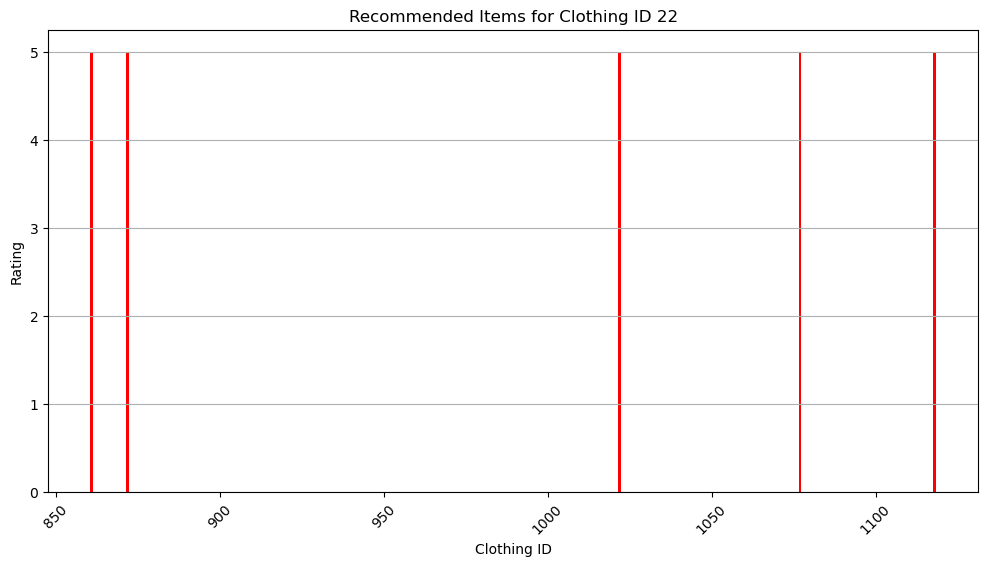

In [21]:
def recommend_items(Clothing_id, cosine_similarities, data, top_n=5):
    indices = pd.Series(data.index, index=data['Clothing ID']).drop_duplicates()
    if Clothing_id not in indices:
        print(f"Clothing ID {Clothing_id} not found in the data.")
        return None
    
    idx = indices[Clothing_id]
    
    # Locating the cosine similarities for the specific Clothing_id 
    similarity_scores = cosine_similarities[idx, :]
    
    # Displaying the indices of the top_n items with highest similarity 
    top_items_indices = similarity_scores.argsort()[::-1][1:top_n+1].flatten()
    
    return data.iloc[top_items_indices]

Clothing_id = 22  # Selected Clothing ID
recommended_items = recommend_items(Clothing_id, cosine_similarities, data)

if recommended_items is not None:
    print(recommended_items)

    # Visualising the recommended Clothing ID
    plt.figure(figsize=(12, 6))
    plt.bar(recommended_items['Clothing ID'], recommended_items['Rating'], color='red')
    plt.xlabel('Clothing ID')
    plt.ylabel('Rating')
    plt.title(f'Recommended Items for Clothing ID {Clothing_id}')
    plt.xticks(rotation=45)  
    plt.grid(axis='y')  
    plt.show()
